Um dos problemas mais comuns em analises de Machine Learning é quando nos deparamos com dados que são desbalanceados, ou seja, onde a variável de interesse ocorre poucas vezes. Tal problema é mais comum na vida real quando queremos modelar fraude, por exemplo, onde o conjunto de dados em que prevalecem as informações de fraude é muito menor que o total de dados. A solução proposta nesse caso não é única, e se modifica de acordo com o problema. De forma geral temos quatro cinco formas de enfrentar o problema de dados desbalanceados (imbalance data): <br>
1. Over-sampling
2. under-sampling
3. Combinar over com under sampling
4. Ensemble
5. Outras formas.

# 1. Over_sampling

In [15]:
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE ,SMOTENC
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

Um dos pacotes do Python mais úteis para isso é o imbalance-learn. Como forma de ilustrar a aplicação do pacote, vamos seguir o documento do mesmo. Como primeiro passo vamos criar um banco de dados que seja desbalanceado e aplicar o modelo de classificação SVM. Veja que temos um total de 5000 informações divididas em três classes, mas que a primeira classe fica com apenas 1% do total de dados, a classe 2 com 5% e a classe 3 com 94%.

Dados em cada uma das classes [(0, 64), (1, 262), (2, 4674)]
Score para um modelo SVM com imbalance-data 0.974


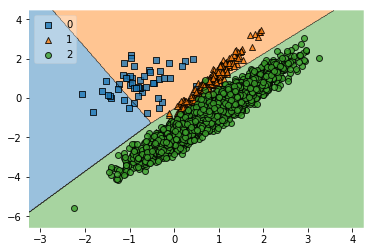

In [2]:
X,y =make_classification(n_samples=5000, n_features=2, n_informative=2, n_classes=3, n_clusters_per_class=1,
                        n_redundant=0,n_repeated=0,weights=[0.01,0.05,0.94],class_sep=0.8,random_state=0)
print("Dados em cada uma das classes",sorted(Counter(y).items()))
clf=LinearSVC(C=1,random_state=0)
svm1=clf.fit(X,y)
classes=svm1.predict(X)
print("Score para um modelo SVM com imbalance-data",svm1.score(X,y))
plot_decision_regions(X=X,y=y,clf=clf,legend=2);

Note que nosso modelo svm não foi capaz de separar, de forma fidedigna, os resultados da classe 0, que tem menor número de dados que as demais. O resultado de 97,4% reflete, em grande medida, a classificação da classe 2 (verde) e uma parte das demais.

### Usando GridSearchCV para obter parametros otimos

Acima especificamos um modelo sem nos preocuparmos com a definição dos parâmetros ótimos. Existe uma opção no Python que permite estimar um modelo buscando o modelo ótimo com base nos parâmetros, o GridSearchCV.

In [3]:
import warnings
warnings.filterwarnings("ignore")
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [10]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': np.logspace(-2, 5, 10, base=10)},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']

In [11]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 2782.559402207126, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.311 (+/-0.001) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 0.05994842503189409, 'gamma': 0.001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 0.05994842503189409, 'gamma': 0.0001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 0.35938136638046275, 'gamma': 0.001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 0.35938136638046275, 'gamma': 0.0001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 2.1544346900318843, 'gamma': 0.001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 2.1544346900318843, 'gamma': 0.0001, 'kernel': 'rbf'}
0.959 (+/-0.024) for {'C': 12.91549665014884, 'gamma': 0.001, 'kernel': 'rbf'}
0.311 (+/-0.001) for {'C': 12.91549665014884, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.009) for {'C': 77.42636826811

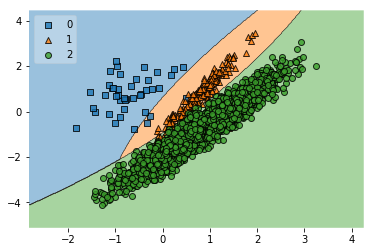

In [12]:
plot_decision_regions(X=x_train,y=y_train,clf=clf,legend=2);

Podemos aplicar o algoritmo treinado no banco de dados de teste. Abaixo mostramos o resultado com um score de 0,988. Veja que conseguimos classificar todas as informações da classe de menor magnitude.

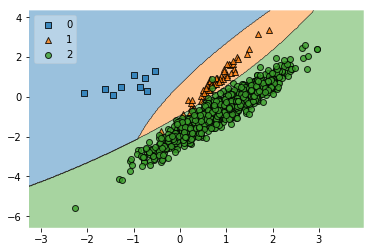

In [13]:
plot_decision_regions(X=x_test,y=y_test,clf=clf,legend=2);

In [16]:
print(confusion_matrix(y_test,y_pred))

[[   9    1    2]
 [   0   51    8]
 [   0    3 1176]]


##########################################

### Corrigindo imbalance data

Agora vamos produzir um conjunto de dados mais balanceado e ver como que os resultados podem se modificar. Para tanto usamos a estratégia de over_sampling primeiro, como mostrado abaixo:

In [19]:
ros=RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X,y)
print("Dados em cada uma das classes",sorted(Counter(y_resampled).items()))

Dados em cada uma das classes [(0, 4674), (1, 4674), (2, 4674)]


parâmetros ótimos: {'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': 10000, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
# Best score: 0.8866067608044501


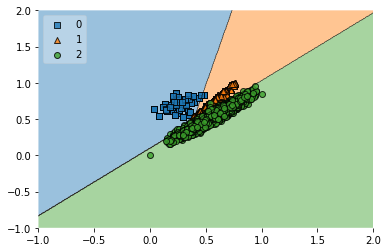

In [21]:
# Vamos criar uma função para encontrar os parâmetros ótimos do SVC
def avalia_svm(x,y, n_jobs=-1):
    # Scale data to 0-1
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    parameters = {'kernel': ['linear'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    model = SVC(max_iter=10000)
    clf = GridSearchCV(model, parameters, n_jobs=n_jobs, cv=3)
    clf.fit(x,y)
    print('parâmetros ótimos:',clf.best_estimator_.get_params())
    print("# Best score:", clf.best_score_)
    plot_decision_regions(X=x,y=y,clf=clf,legend=2)
    return clf
#
clf2 = avalia_svm(X_resampled,y_resampled)
y_pred=clf2.predict(X)

Veja que temos um total de 64 dados na classe 0, nos dados originais. Nosso modelo classificou 47 dessas de forma certa. VEja que o maior erro de classificação ocorre na classe 1 e, no caso da classe 2, classificamos errado apenas 3 de um total de 4.674.

In [22]:
print(confusion_matrix(y,y_pred))

[[  47    1   16]
 [   0  118  144]
 [   0    3 4671]]


#### Usando o SMOTE

A seguir ilustramos como o rebalanceamento dos dados pode ser feito usando uma outra ferramenta do pacote, o SMOTE. Veja que os resultados para o SVM melhoram um pouco, e somos capazes de classificar quase que todos os resultados para a classe 0

nova divisão das classes dict_items([(2, 4674), (1, 4674), (0, 4674)])
score para o modelo SVM usando SMOTE 0.8389673370417915


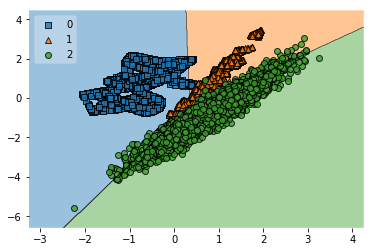

In [23]:
X_resampled2, y_resampled2 = SMOTE().fit_resample(X,y)
print("nova divisão das classes",Counter(y_resampled2).items())
svm3=LinearSVC().fit(X_resampled2,y_resampled2)
print("score para o modelo SVM usando SMOTE",svm3.score(X_resampled2,y_resampled2))
plot_decision_regions(X=X_resampled2,y=y_resampled2,clf=svm3,legend=2)

Alternativamente podemos usar outro algoritmo para fazer esse rebalanceamento dos dados, o ADASYN.

nova divisão das classes dict_items([(2, 4674), (1, 4662), (0, 4673)])
score para o modelo SVM usando ADASYN 0.4194446427296738


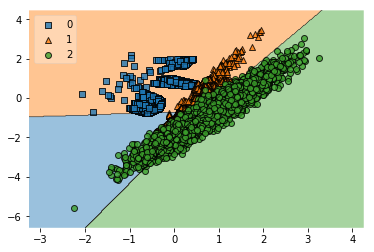

In [50]:
X_resampled3, y_resampled3 = ADASYN().fit_resample(X,y)
print("nova divisão das classes",Counter(y_resampled3).items())
svm4=LinearSVC().fit(X_resampled3,y_resampled3)
print("score para o modelo SVM usando ADASYN",svm4.score(X_resampled3,y_resampled3))
plot_decision_regions(X=X_resampled3,y=y_resampled3,clf=svm4,legend=2)

Em resumo. O RandomOverSampler apenas duplica alguns dos dados originais que estão na classe minoritária. Já o SMOTE e o ADASYN fazem uso de interpolação, onde o ADASYN gera uma amostra que esteja mais perto da amostra original, com foco nos outliers e isso piora os resultados quando usamos o K-nearest. Já o SMOTE gera uma amostra independente se os dados estão muito perto dos originais ou não e tem a vantagem de outras 2 outras variantes com amostras perto da fronteira: BorderlineSMOTE e SMOTENC. Vamos ilustrar essas duas opções:

Vejamos o resultado usando o BorderlineSMOTE. Veja que a classificação via SVM resultou em um score de 0.99, ou seja, não só foi possível classificar todas as informações da classe minoritária como também das demais com uma precisão espantosa!

nova divisão das classes dict_items([(2, 4674), (1, 4674), (0, 4674)])
score para o modelo SVM usando ADASYN 0.9927970332334902


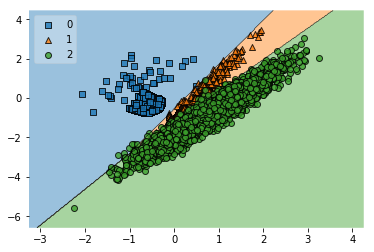

In [52]:
X_resampled4, y_resampled4 = BorderlineSMOTE().fit_resample(X,y)
print("nova divisão das classes",Counter(y_resampled4).items())
svm5=LinearSVC().fit(X_resampled4,y_resampled4)
print("score para o modelo SVM usando ADASYN",svm5.score(X_resampled4,y_resampled4))
plot_decision_regions(X=X_resampled4,y=y_resampled4,clf=svm5,legend=2)

### Usando Pipeline
Agora vamos ver uma funcionalidade interessante para aplicação de diferentes algoritmos em uma única função usando o recurso do pipeline. Primeiro abrimos os pacotes e a seguir construímos a função para fazer o gráfico. Por fim, aplicamos o pipeline aos diferentes algoritmos.

In [3]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import (RandomOverSampler, SMOTE, 
                                    ADASYN, BorderlineSMOTE ,SMOTENC)

In [7]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

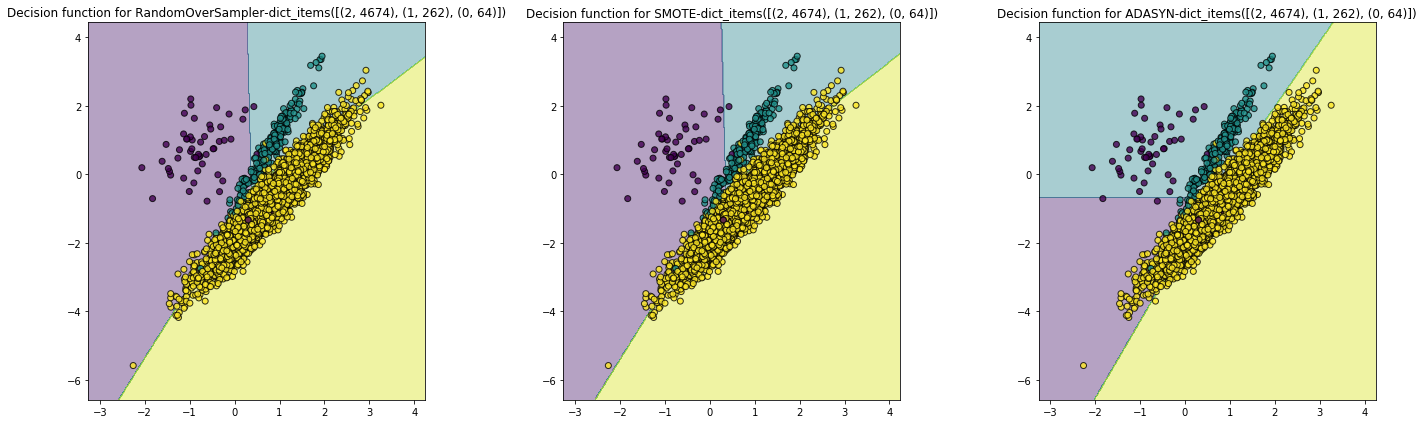

In [38]:
fig, ((ax1),(ax2),(ax3))=plt.subplots(1,3,figsize=(20,6))
ax_arr=((ax1),(ax2),(ax3))
for ax, sampler in zip(ax_arr,(RandomOverSampler(random_state=0),SMOTE(),ADASYN())):
    clf=make_pipeline(sampler,LinearSVC(C=1,random_state=0))
    clf.fit(X,y)
    plot_decision_function(X,y,clf,ax)
    ax.set_title('Decision function for {}-{}'.format(
        sampler.__class__.__name__,Counter(y).items()))
fig.tight_layout()